Objective: The objective of this assignment is to perform binary classification on the hepatitis dataset using a Decision Tree classifier. Students will be required to read the dataset from a GitHub repository, build a Decision Tree model, and evaluate its performance using various metrics

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
import numpy as np
import plotly.express as px

# 1.Data Loading

In [429]:
url= "https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/hepatitis.csv"
df = pd.read_csv(url)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [430]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,154.0,0.207792,0.407051,0.0,0.00,0.0,0.00,1.0
AGE,154.0,41.246753,12.593344,7.0,32.00,39.0,50.00,78.0
SEX,154.0,1.103896,0.306121,1.0,1.00,1.0,1.00,2.0
STEROID,153.0,1.509804,0.501546,1.0,1.00,2.0,2.00,2.0
ANTIVIRALS,154.0,1.844156,0.363891,1.0,2.00,2.0,2.00,2.0
FATIGUE,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
MALAISE,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
ANOREXIA,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
LIVER BIG,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
LIVER FIRM,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0


# 2.Data Preprocessing

In [431]:
#shape
df.shape

(154, 20)

In [432]:
df.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    int64  
 1   AGE              154 non-null    int64  
 2   SEX              154 non-null    int64  
 3   STEROID          153 non-null    float64
 4   ANTIVIRALS       154 non-null    int64  
 5   FATIGUE          154 non-null    int64  
 6   MALAISE          154 non-null    int64  
 7   ANOREXIA         154 non-null    int64  
 8   LIVER BIG        145 non-null    float64
 9   LIVER FIRM       144 non-null    float64
 10  SPLEEN PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [433]:
df.isnull().sum() #finding missing values

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [434]:
df.isnull().sum()/ df.shape[0]*100 #percentage of missing values

Class               0.000000
AGE                 0.000000
SEX                 0.000000
STEROID             0.649351
ANTIVIRALS          0.000000
FATIGUE             0.000000
MALAISE             0.000000
ANOREXIA            0.000000
LIVER BIG           5.844156
LIVER FIRM          6.493506
SPLEEN PALPABLE     2.597403
SPIDERS             2.597403
ASCITES             2.597403
VARICES             2.597403
BILIRUBIN           3.246753
ALK PHOSPHATE      18.181818
SGOT                1.948052
ALBUMIN             9.740260
PROTIME            42.857143
HISTOLOGY           0.000000
dtype: float64

In [435]:
#handling the missing value
df = df.drop('PROTIME', axis=1)
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,2


In [436]:
from sklearn.impute import KNNImputer
impute= KNNImputer()
for i in df.columns:
    df[i]= impute.fit_transform(df[[i]])
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,0.0,30.0,2.0,1.000000,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,1.0
1,0.0,50.0,1.0,1.000000,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,1.0
2,0.0,78.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,1.0
3,0.0,31.0,1.0,1.509804,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,1.0
4,0.0,34.0,1.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,46.0,1.0,2.000000,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,2.0
150,0.0,44.0,1.0,2.000000,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,2.0
151,0.0,61.0,1.0,1.000000,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,2.0
152,0.0,53.0,2.0,1.000000,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,2.0


In [437]:
df.duplicated().sum() #finding duplicates

0

In [438]:
df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
HISTOLOGY          0
dtype: int64

In [439]:
df.nunique()

Class               2
AGE                49
SEX                 2
STEROID             3
ANTIVIRALS          2
FATIGUE             2
MALAISE             2
ANOREXIA            2
LIVER BIG           3
LIVER FIRM          3
SPLEEN PALPABLE     3
SPIDERS             3
ASCITES             3
VARICES             3
BILIRUBIN          35
ALK PHOSPHATE      84
SGOT               85
ALBUMIN            30
HISTOLOGY           2
dtype: int64

scaling

In [440]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
for j in df.columns:
    if df[j].nunique() > 1:
        df[j] = scale.fit_transform(df[[j]])

In [441]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,0.0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860,0.0
1,0.0,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581,0.0
2,0.0,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860,0.0
3,0.0,0.338028,0.0,0.509804,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860,0.0
4,0.0,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.294890,0.293375,0.441860,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,0.549296,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.948052,0.294890,0.359621,0.279070,1.0
150,0.0,0.521127,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.077922,0.371747,0.201893,0.511628,1.0
151,0.0,0.760563,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.064935,0.182156,0.009464,0.465116,1.0
152,0.0,0.647887,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.155844,0.204461,0.007886,0.465116,1.0


In [442]:
df.HISTOLOGY.value_counts()

0.0    84
1.0    70
Name: HISTOLOGY, dtype: int64

<AxesSubplot:xlabel='HISTOLOGY', ylabel='count'>

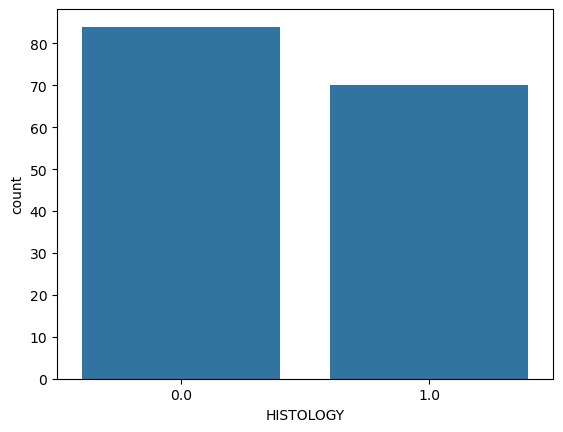

In [443]:
sns.countplot(x='HISTOLOGY', data=df)

In [444]:
df.SEX.value_counts()

0.0    138
1.0     16
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

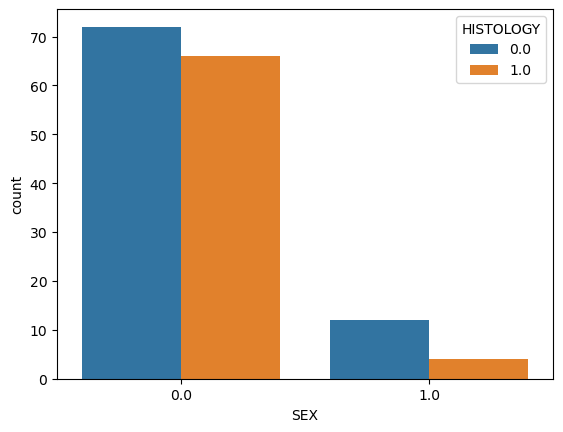

In [445]:
sns.countplot(x = 'SEX', data=df, hue='HISTOLOGY')

In [446]:
#data spliting
x = df.drop(["HISTOLOGY"],axis = 1)
y = df["HISTOLOGY"]

In [447]:
x

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN
0,0.0,0.323944,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.219331,0.006309,0.441860
1,0.0,0.605634,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.077922,0.405204,0.044164,0.325581
2,0.0,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.260223,0.028391,0.441860
3,0.0,0.338028,0.0,0.509804,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.051948,0.074349,0.059937,0.441860
4,0.0,0.380282,0.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.090909,0.294890,0.293375,0.441860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1.0,0.549296,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.948052,0.294890,0.359621,0.279070
150,0.0,0.521127,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.077922,0.371747,0.201893,0.511628
151,0.0,0.760563,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.064935,0.182156,0.009464,0.465116
152,0.0,0.647887,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.155844,0.204461,0.007886,0.465116


In [448]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
149    1.0
150    1.0
151    1.0
152    1.0
153    1.0
Name: HISTOLOGY, Length: 154, dtype: float64

In [449]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, train_size=.70)
xtrain.shape

(107, 18)

# 3.decision Tree Model

In [450]:
from sklearn.tree import DecisionTreeClassifier
dcls = DecisionTreeClassifier()
dcls.fit(xtrain, ytrain)


DecisionTreeClassifier()

[Text(0.37083333333333335, 0.9444444444444444, 'ASCITES <= 0.433\ngini = 0.495\nsamples = 107\nvalue = [59.0, 48.0]'),
 Text(0.3375, 0.8333333333333334, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.4041666666666667, 0.8333333333333334, 'SPIDERS <= 0.33\ngini = 0.46\nsamples = 92\nvalue = [59, 33]'),
 Text(0.16666666666666666, 0.7222222222222222, 'AGE <= 0.465\ngini = 0.488\nsamples = 26\nvalue = [11.0, 15.0]'),
 Text(0.06666666666666667, 0.6111111111111112, 'ALBUMIN <= 0.221\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.03333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1, 0.5, 'BILIRUBIN <= 0.084\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.06666666666666667, 0.3888888888888889, 'AGE <= 0.401\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.03333333333333333, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1, 0.2777777777777778, 'ALBUMIN <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.06666666

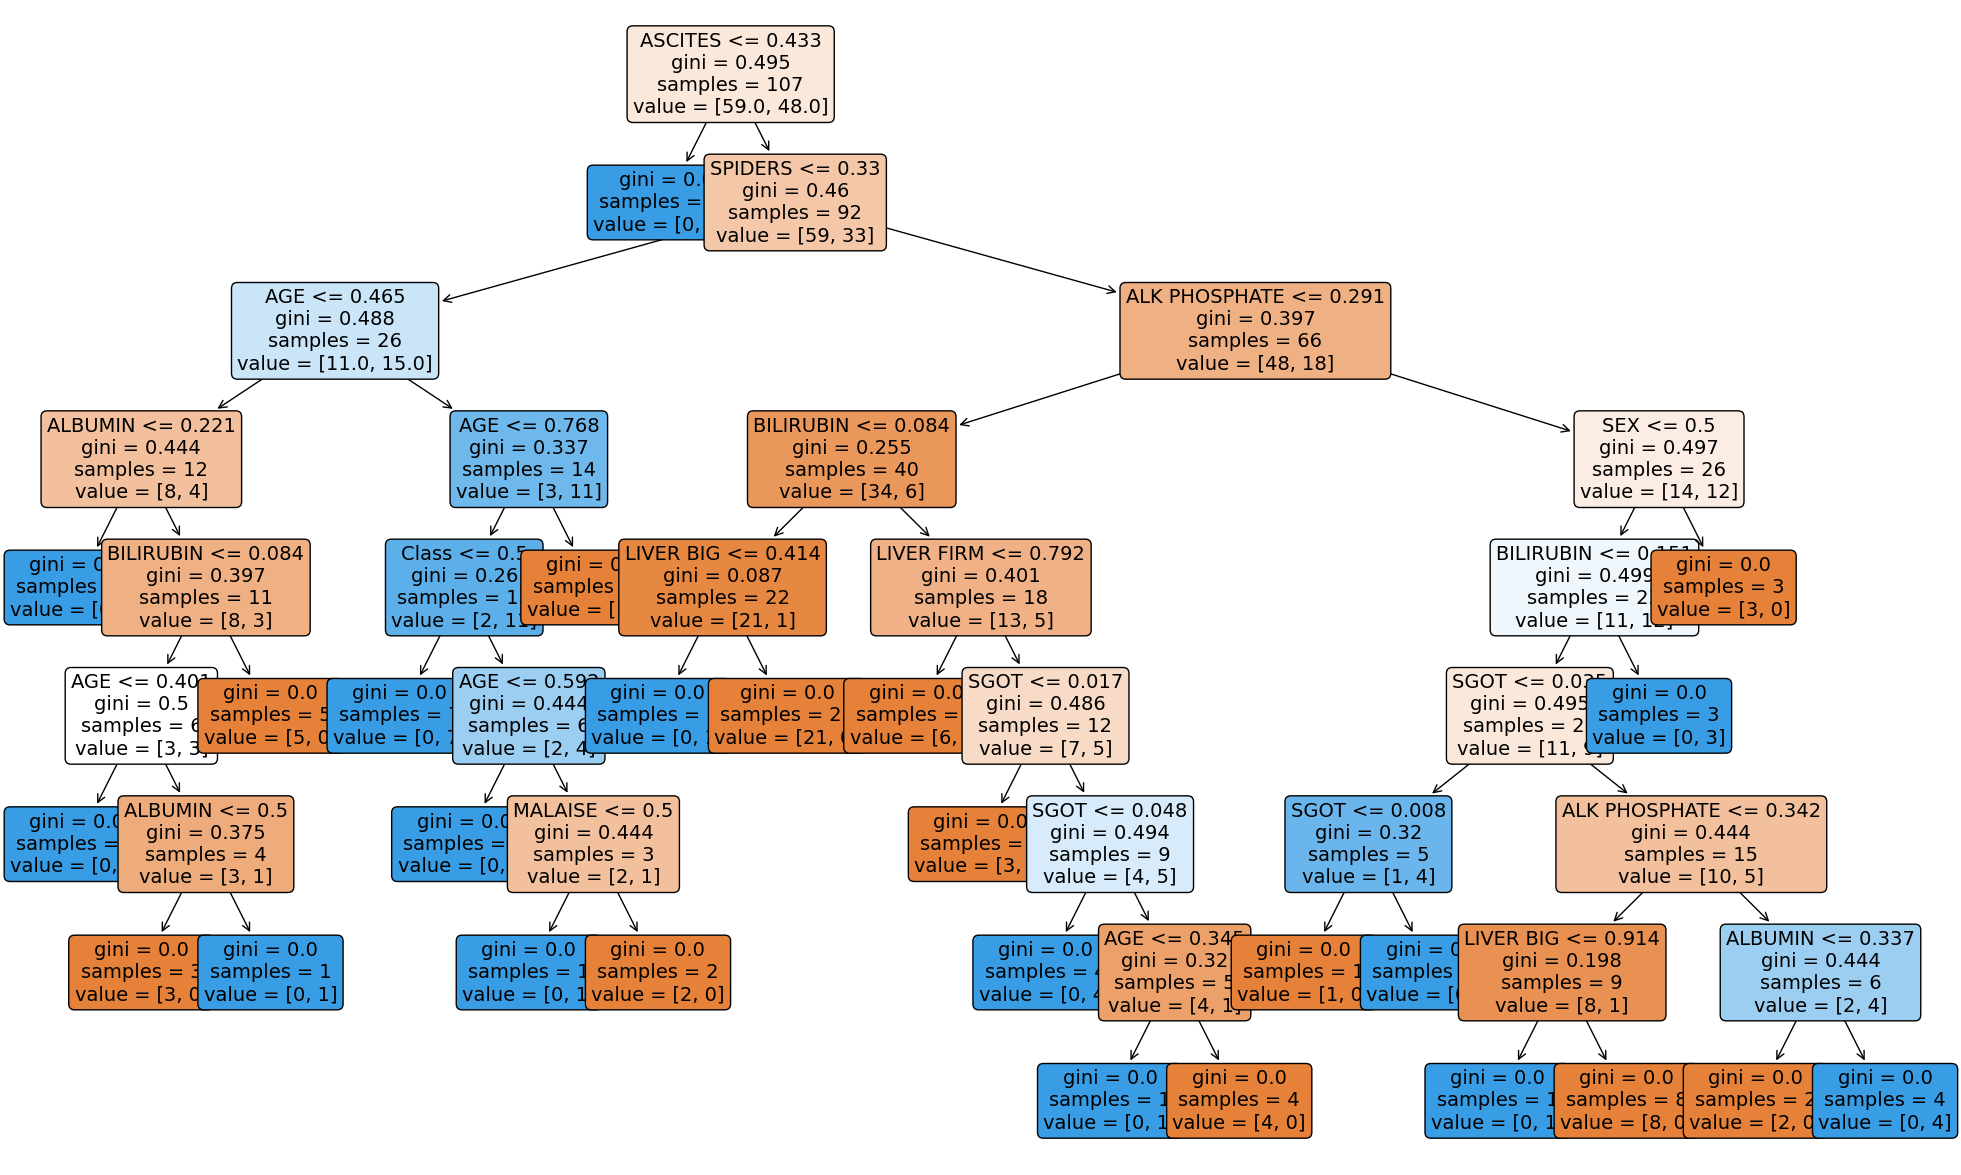

In [451]:
plt.figure(figsize=(25,15))
tree.plot_tree(dcls, feature_names=x.columns, rounded=True, filled=True, fontsize = 14)

# 4. Model Evaluation:

In [452]:
predict = dcls.predict(xtrain)
predict

array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1.])

In [453]:
dcls.score(xtrain, ytrain)

1.0

In [454]:
predict2 = dcls.predict(xtest) 
predict2

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

In [455]:
dcls.score(xtest, ytest)

0.6808510638297872

Confusion Matrix

In [456]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,RocCurveDisplay

In [457]:
pred_test = dcls.predict(xtest) 
pred_test

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])

In [458]:
dcls.score(xtest, ytest)

0.6808510638297872

In [459]:
accuracy_score(ytest, dcls.predict(xtest))

0.6808510638297872

In [460]:
confusion_matrix(ytest, pred_test)

array([[17,  8],
       [ 7, 15]])

In [461]:
c_mat = confusion_matrix(ytest, dcls.predict(xtest))
c_mat

array([[17,  8],
       [ 7, 15]])

<AxesSubplot:>

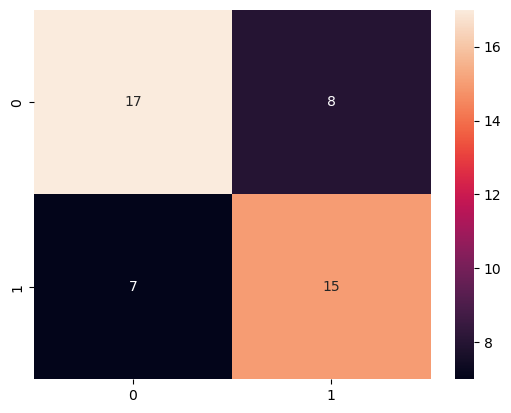

In [462]:
sns.heatmap(c_mat, annot=True )

Precision

In [463]:
precision_score(ytest, dcls.predict(xtest))

0.6521739130434783

Recall

In [464]:
recall_score(ytest, dcls.predict(xtest))

0.6818181818181818

F1 Score

In [465]:
f1_score(ytest, dcls.predict(xtest))

0.6666666666666666

In [466]:
print(classification_report(ytest, dcls.predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.71      0.68      0.69        25
         1.0       0.65      0.68      0.67        22

    accuracy                           0.68        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.68      0.68      0.68        47



AUC-ROC Score

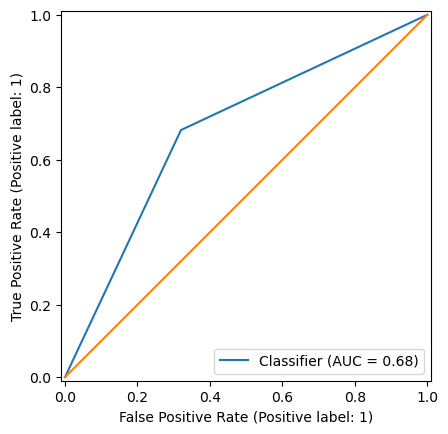

In [467]:
RocCurveDisplay.from_predictions(ytest,dcls.predict(xtest))
plt.plot([0,1],[0,1])
plt.show()

In [468]:
#AUC= 68, which is above 50% so the model will work but not much accurately